In [56]:
import glob
import pandas as pd
import seaborn as sns

In [5]:
files = []
files = glob.glob('sub*/tables/*csv')

In [47]:
len(files)

718

In [76]:
li = []
for file in files:
    sub=file.split('_')[0]
    
    df = pd.read_csv(file)
    df['sub']=sub
    roiList=[ 'ctx-lh-entorhinal', 'Left-Hippocampus', 'Left-Amygdala', 'ctx-rh-entorhinal', 'Right-Hippocampus', 'Right-Amygdala' ]

    li.append(df[df['name'].isin(roiList)])
    
frame = pd.concat(li, axis=0)
frame.columns = frame.columns.str.lstrip()

[Text(0.5, 0, 'ROI')]

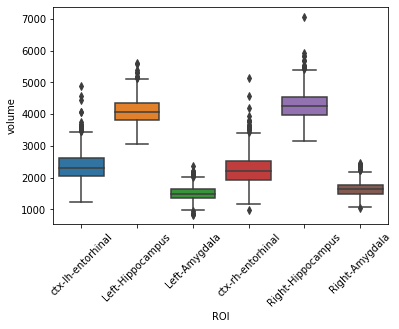

In [80]:
ax = sns.boxplot(x="name", y='volume', data=frame)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='ROI')

In [55]:
print(frame.groupby('name').agg(['mean', 'std']))

                     ID            volume            
                   mean  std         mean         std
name                                                 
Left-Amygdala        18  0.0  1499.436384  217.491172
Left-Hippocampus     17  0.0  4088.739248  412.390724
Right-Amygdala       54  0.0  1649.026446  219.944151
Right-Hippocampus    53  0.0  4282.208922  459.672180
ctx-lh-entorhinal  1006  0.0  2352.555159  482.347239
ctx-rh-entorhinal  2006  0.0  2278.513940  500.564593


In [81]:
demog = pd.read_csv('data-2020-06-09T15_45_49.009Z.csv')

In [82]:
frame.pivot(index='sub', columns='name')['volume']

ValueError: Index contains duplicate entries, cannot reshape